## Author : Syed Arsalan Amin
## DataScience and Business Intelligence Internship - The Sparks Foundation
### Task-2 : Prediction using Unsupervised ML (K-means clustering)
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.
#### Github repository : [DataScience-and-Business-Intelligence](https://github.com/SyedArsalanAmin/DataScience-and-Business-Intelligence)
#### Download dataset : [Iris Dataset](https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view)

## Importing libraries

In [41]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

## Loading iris dataset and visualizing the dataframe

In [28]:
# importing data
df = pd.read_csv("E:\DataScience & AI\Github_repo\datasets\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
df = df.drop(columns=['Species', 'Id']) #dropping the 'Species' and 'Id' columns.
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


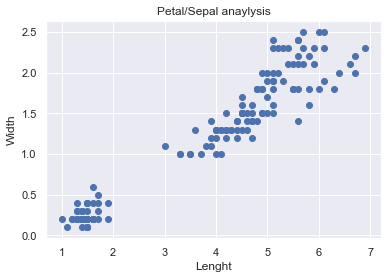

In [30]:
def scatter_plot(dataset, col1, col2):
    plt.scatter(dataset.iloc[:, col1], dataset.iloc[:, col2])
    plt.xlabel("Lenght")
    plt.ylabel("Width")
    plt.title("Petal/Sepal anaylysis")


scatter_plot(df, 2, 3)  # visualizing petal data

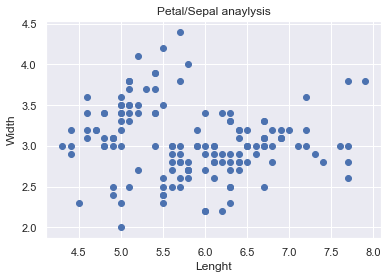

In [31]:
scatter_plot(df, 0, 1)  # visualizing sepal data

In [43]:
df.describe()  # looking into the data for insights

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778,0.853333
std,0.230018,0.180664,0.299054,0.317984,0.805907
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,1.000000
75%,0.583333,0.541667,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000


####  For a better understading of the data let's take a look at the correlation between different multidimentional features

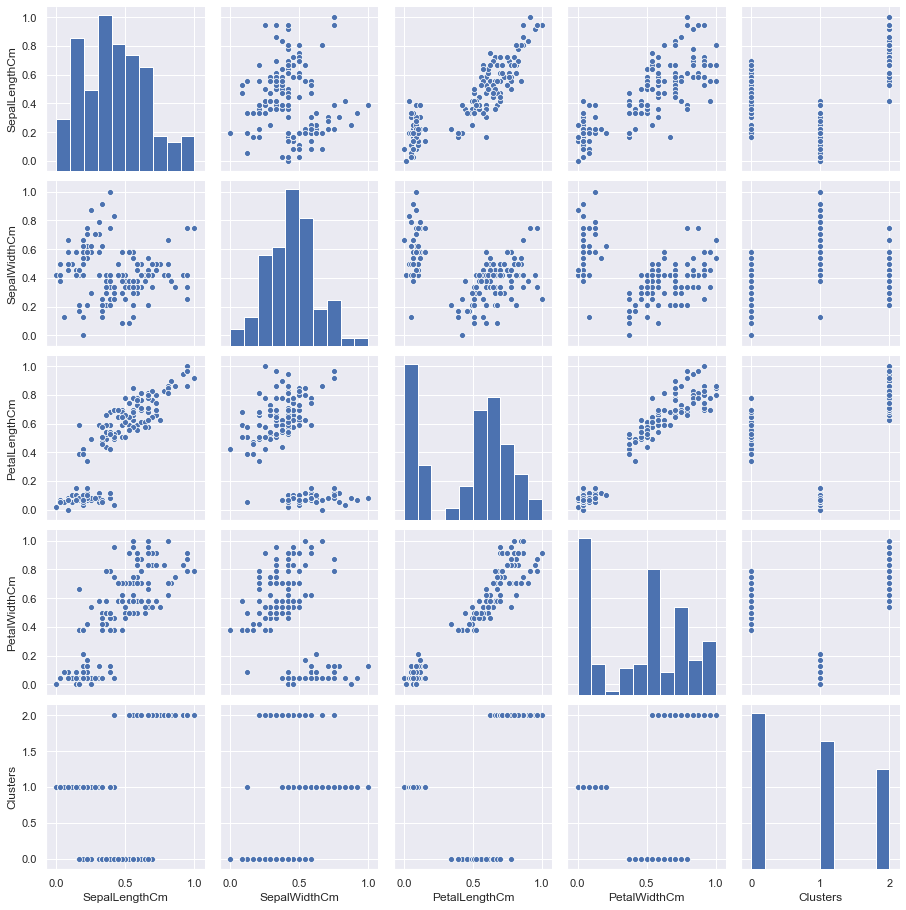

In [45]:
sns.pairplot(df)

## Normalizing dataset

In [46]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df)  # scaling dataframe
scaled_features.shape
scaled_features[:3]  # these are the normalized feature set between 0-1

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.5       ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.5       ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.5       ]])

## Predicting suitable no. of cluster using Elbow method
From thr following plot you can see clearly that there is not significant decrease in the cost so we should take 3 as the no. of cluster.

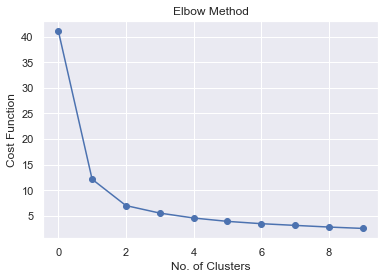

In [33]:
# Using Elbow method to predict the no. of clusters

def elbow():

    cost = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit_predict(scaled_features)
        cost.append(kmeans.inertia_)

    plt.plot(np.arange(0, 10), cost, marker='o')
    plt.title("Elbow Method")
    plt.xlabel("No. of Clusters")
    plt.ylabel("Cost Function")


elbow()

In [49]:
# kmeans to preict the category of cluster each iris belong to
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(scaled_features)
y_pred  # so thses are the predicted categories of the data we provided to kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## Updating dataset with the normalized values

In [48]:
# Making normalized dataset
df["SepalLengthCm"] = scaled_features[:, 0]
df["SepalWidthCm"] = scaled_features[:, 1]
df["PetalLengthCm"] = scaled_features[:, 2]
df["PetalWidthCm"] = scaled_features[:, 3]
df["Clusters"] = y_pred
df.head()  # Normalized dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1


## Storing clusters in variables

In [36]:
# Making Petal Clusters
pet_cluster1 = df[df['Clusters'] == 0].reset_index(drop=True)
pet_cluster1.head(3)
pet_cluster2 = df[df['Clusters'] == 1].reset_index(drop=True)
pet_cluster3 = df[df['Clusters'] == 2].reset_index(drop=True)

In [47]:
# Making Sepal Clusters
sep_cluster1 = df[df['Clusters'] == 0].reset_index(drop=True)
sep_cluster2 = df[df['Clusters'] == 1].reset_index(drop=True)
sep_cluster3 = df[df['Clusters'] == 2].reset_index(drop=True)

## Visualizing Clusters

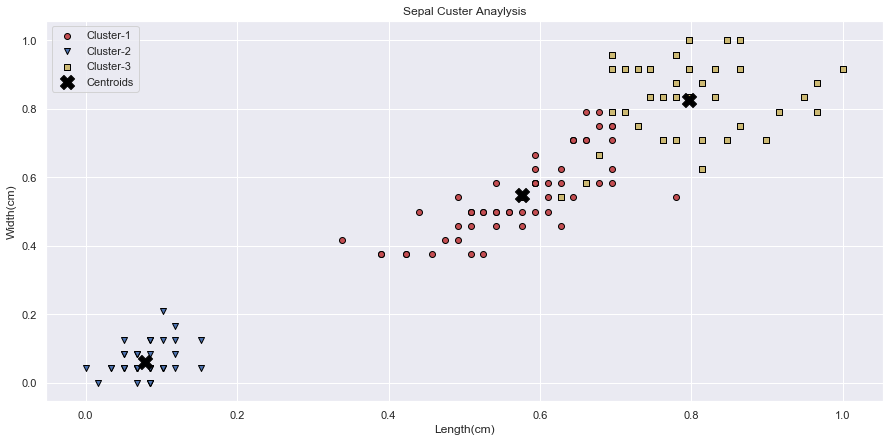

In [38]:
# Plotting clusters
def plot_sep_cluster():
    plt.figure(figsize=(15, 7))

    plt.scatter(sep_cluster1.iloc[:, 2], sep_cluster1.iloc[:, 3], c='r',
                marker='o', edgecolors='black', label="Cluster-1")
    plt.scatter(sep_cluster2.iloc[:, 2], sep_cluster2.iloc[:, 3], c='b',
                marker='v', edgecolors='black', label="Cluster-2")
    plt.scatter(sep_cluster3.iloc[:, 2], sep_cluster3.iloc[:, 3], c='y',
                marker='s', edgecolors='black', label="Cluster-3")

    centers = kmeans.cluster_centers_[:, -2:]  # cluster center for petals
    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label="Centroids")

    plt.xlabel('Length(cm)')
    plt.ylabel('Width(cm)')
    plt.legend()
    plt.title("Sepal Custer Anaylysis")
    plt.show()


plot_sep_cluster()

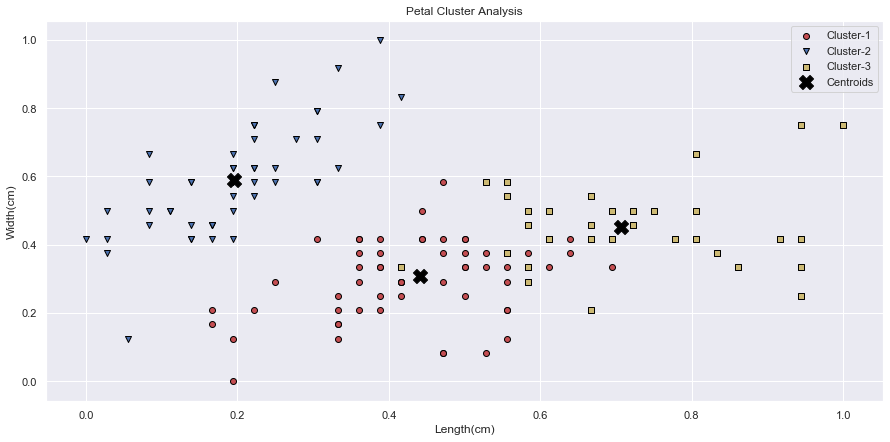

In [39]:
def plot_pet_cluster():
    plt.figure(figsize=(15, 7))

    plt.scatter(pet_cluster1.iloc[:, 0], pet_cluster1.iloc[:, 1], c='r',
                marker='o', edgecolors='black', label="Cluster-1")
    plt.scatter(pet_cluster2.iloc[:, 0], pet_cluster2.iloc[:, 1], c='b',
                marker='v', edgecolors='black', label="Cluster-2")
    plt.scatter(pet_cluster3.iloc[:, 0], pet_cluster3.iloc[:, 1], c='y',
                marker='s', edgecolors='black', label="Cluster-3")

    centers = kmeans.cluster_centers_[:, :-2]  # cluster center for petals
    centers
    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label="Centroids")

    plt.xlabel('Length(cm)')
    plt.ylabel('Width(cm)')
    plt.legend()
    plt.title("Petal Cluster Analysis")
    plt.show()


plot_pet_cluster()